<a href="https://colab.research.google.com/github/akshat-d-jain/Reinforcement-Learning/blob/main/RL_Lab_5_q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/content/utils.py:247: DeprecationWarning: invalid escape sequence '\p'
  plt.title("$\pi(s)$", size=16)


/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Observation Space: MultiDiscrete([5 5])
Action Space: Discrete(4)


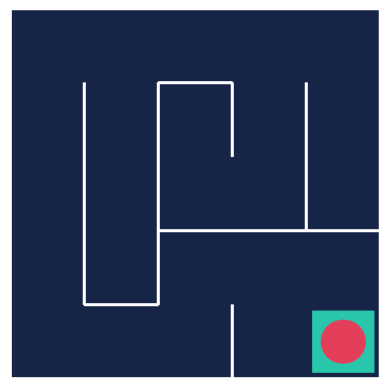

In [3]:
env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

print(f'Observation Space: {env.observation_space}')
print(f'Action Space: {env.action_space}')

action_values = np.zeros(shape=(5,5,4))

In [4]:
def target_policy(state):
  av = action_values[state]
  return np.random.choice(np.flatnonzero(av == av.max()))

In [5]:
def exploratory_policy(state):
  return np.random.randint(4)

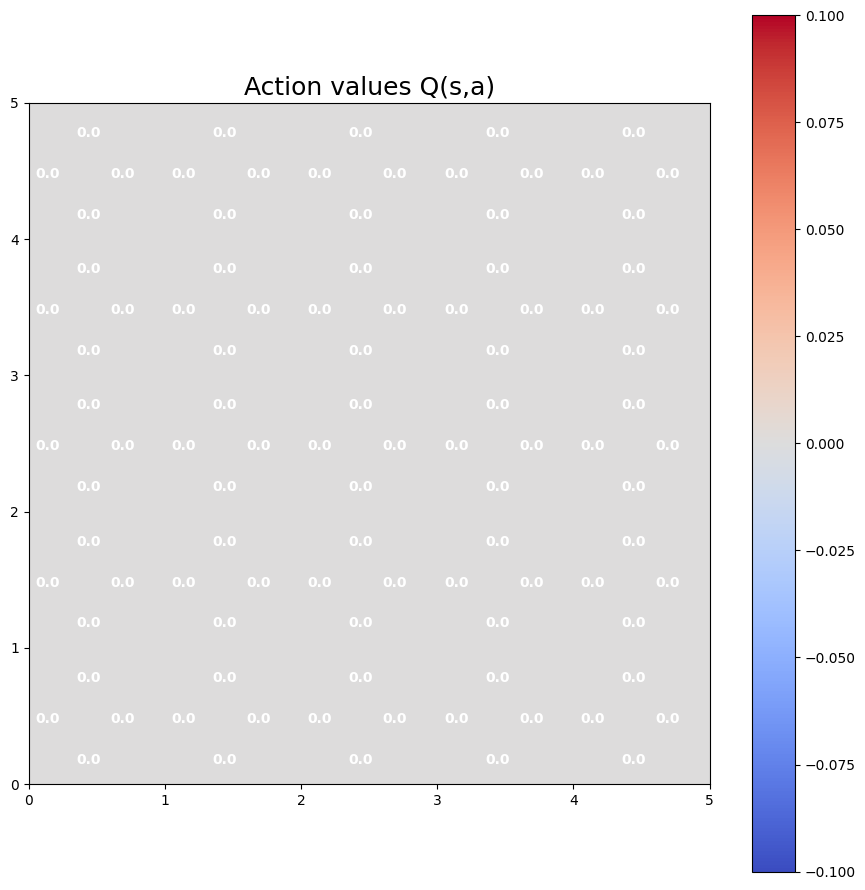

In [6]:
plot_action_values(action_values)

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


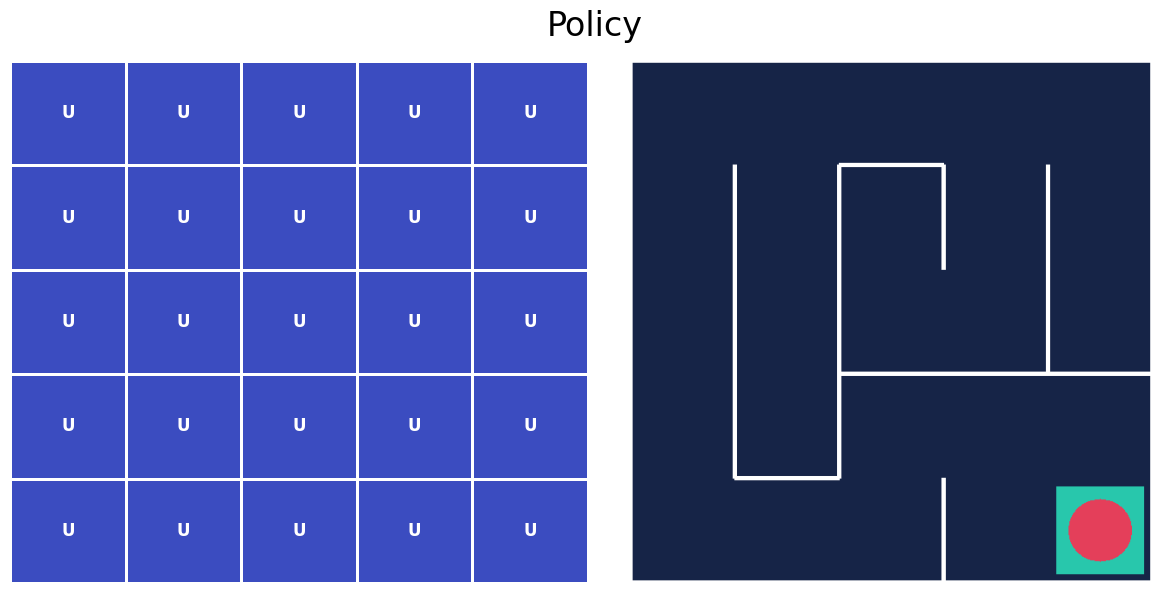

In [7]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [8]:
def q_learning(action_values, exploratory_policy, target_policy,episodes, alpha = 0.1 , gamma = 0.99):

  for episode in range(1, episodes+1):
    state = env.reset()
    done = False

    while not done :
      action = exploratory_policy(state)
      next_state, reward, done, _ = env.step(action)
      next_action = target_policy(next_state)

      qsa = action_values[state][action]
      next_qsa = action_values[next_state][next_action]
      action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

      state = next_state




In [12]:
q_learning(action_values, exploratory_policy, target_policy,100)

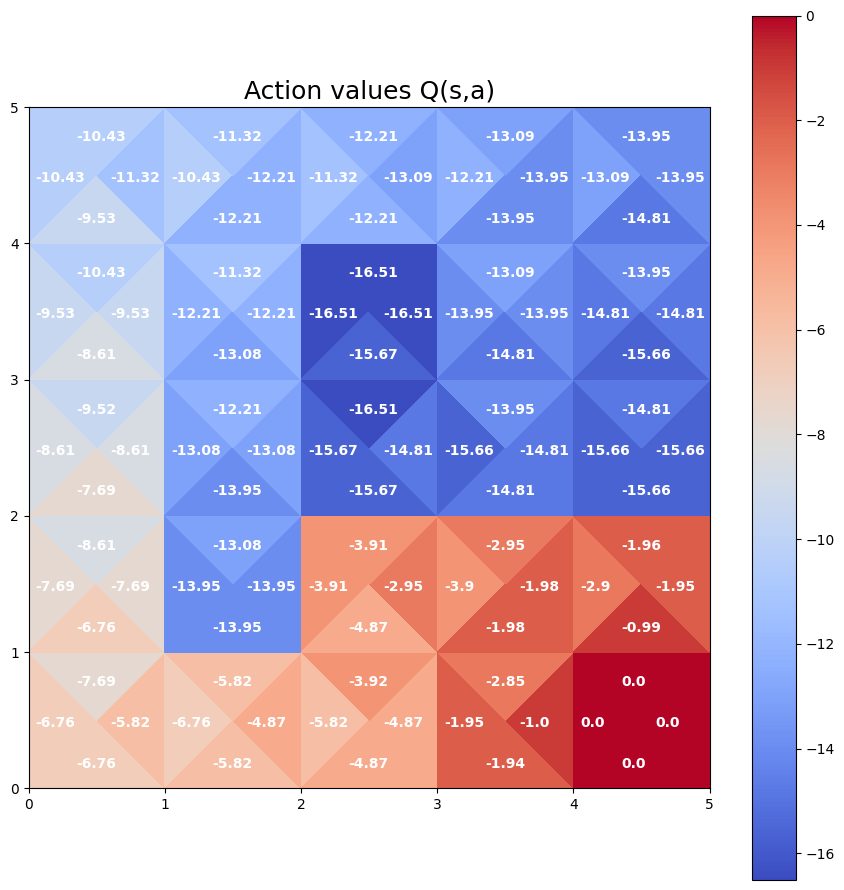

In [13]:
plot_action_values(action_values)

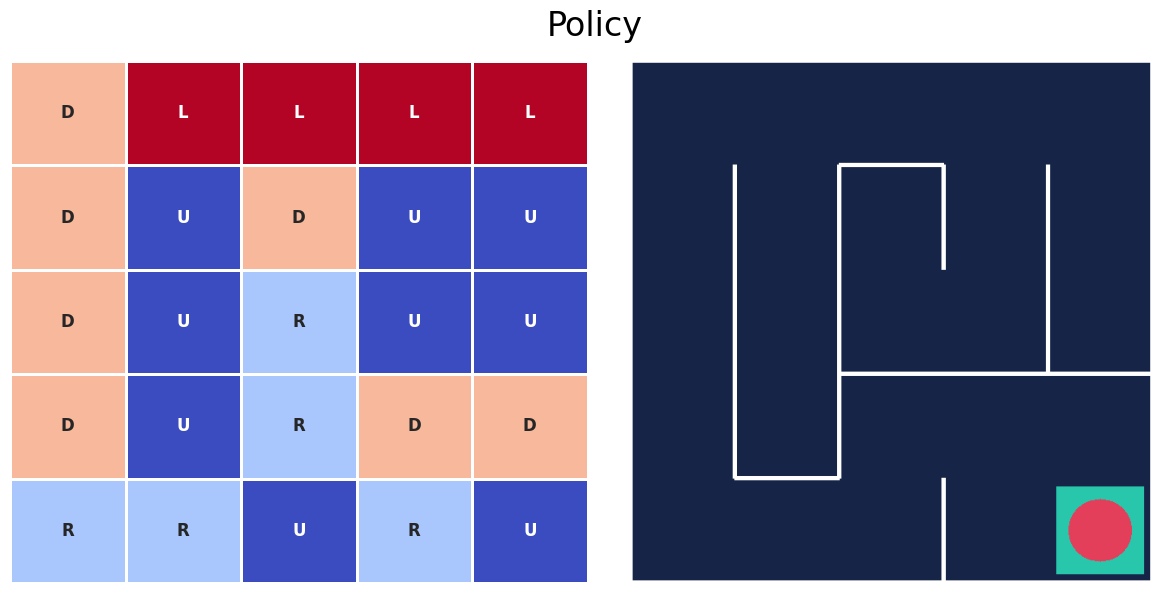

In [14]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

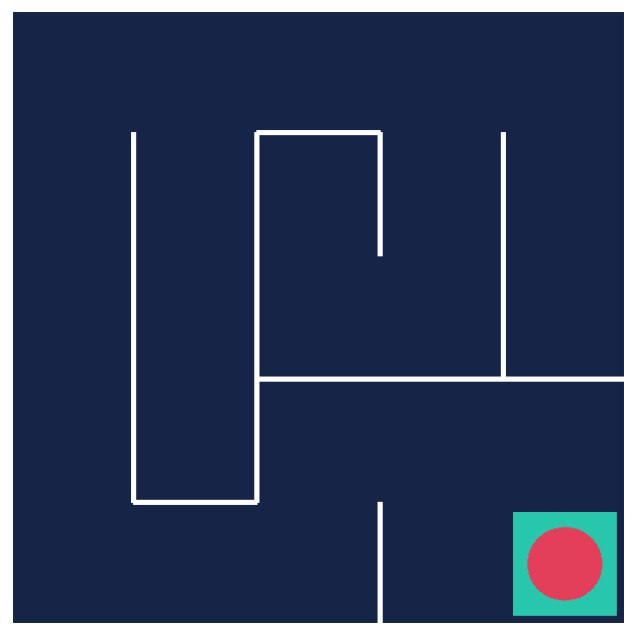

In [15]:
test_agent(env, target_policy , episodes = 5)